# TechAcademy: Honey and Bees Python Solution

 # Exlporatory Data Analysis (EDA)

## Import Packages

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

## Plot Styles

In [26]:
plt.style.use('./styles/ta.mplstyle')  # TA-Style
myFmt = mdates.DateFormatter('%Y-%m')

## Load the data

In [3]:
# Bees
bees = pd.read_csv('https://drive.google.com/uc?export=download&id=1lop3qnrSve5A13jNcL6wCehGpDaCrGRO', index_col=0)
# Honey
honey = pd.read_csv('https://drive.google.com/uc?export=download&id=1bQtWQluwwGUIgZuDOsJOE-4Om7x4HOxP', index_col=0)
# Stressors
stressors = pd.read_csv('https://drive.google.com/uc?export=download&id=1nqCXkgnaLDQtO0M-K--rAcatuZD_VLXq', index_col=0)
# Weather
weather = pd.read_csv('https://drive.google.com/uc?export=download&id=1N78o7a8l2v9O9T3rurGfyEBAZEAOTG2h', index_col=0)

## Rename the weather index nicely

In [ ]:
# enjoy this link to rename the weather index https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
weather.rename(index=abbrev_to_us_state, inplace=True)

## Get a feeling for the data

In [4]:
print(bees.head())
print(honey.head())
print(stressors.head())
print(weather.head())

print(bees.dtypes)
print(honey.dtypes)
print(stressors.dtypes)
print(weather.dtypes)

            Date Starting Colonies Maximum Colonies Lost Colonies  \
State                                                               
Alabama  2015-Q3              8500             9000          1400   
Alabama  2015-Q4              8000             8000           610   
Alabama  2016-Q1              7500             7500          1700   
Alabama  2015-Q2              7500             7500           860   
Alabama  2015-Q1              7000             7000          1800   

        Added Colonies Renovated Colonies Percent Renovated  \
State                                                         
Alabama            160                260                 3   
Alabama             80                 60                 1   
Alabama           2100                 90                 1   
Alabama           1900                680                 9   
Alabama           2800                250                 4   

        Varroa Mites (Percent) Other pests and parasites (Percent)  \
Stat

## Task 1: Convert from pounds to kg and prices to $/kg

In [5]:
honey["honey_producing_colonies"] = honey["Honey producing colonies (thousand)"] * 1000
honey["yield_colony_kg"] = honey["Yield per colony (pounds)"] * 0.453592
honey["production_kg"] = honey["Production (1,000 pounds)"] * 1000 * 0.453592
honey["stock_price_kg"] = honey["Stocks December 15  (1,000 pounds) "] / 1000 * 0.453592 * 100
honey["avg_price_kk"] = honey["Average price per pound (dollars)"] * 0.453592
honey["prod_value"] = honey["Value of production (1,000 dollars)"] * 1000

honey.drop(
    ["Honey producing colonies (thousand)", "Yield per colony (pounds)", "Production (1,000 pounds)",
     "Stocks December 15  (1,000 pounds) ", "Average price per pound (dollars)", "Value of production (1,000 dollars)"],
    axis=1,
    inplace=True,
)

## Task 2: write loop to round up to the decimal place you prefer (does not make sense for Python really)

In [7]:
honey = honey.round(2)

## Task 3: Years in date format

In [8]:
honey.Year = pd.to_datetime(honey.Year, format="%Y")  # assumes start of year 01.01 by convention
stressors.Year = pd.to_datetime(stressors.Year)  # actually with Quarter included
bees.Date = pd.to_datetime(bees.Date)
weather.datetime = pd.to_datetime(weather.datetime)

## Task 4: numbers into numeric format, numeric should be a loop

## Task 5: Calculate the percentage of lost colonies & round, why id you decide to round the way you have to?

## Other stuff

In [30]:
# average production by state
avg_state_prod = honey.groupby(honey.index)["production_kg"].mean()

# production by state and year
state_year_prod = honey.groupby([honey.index, honey.Year])["production_kg"].sum()


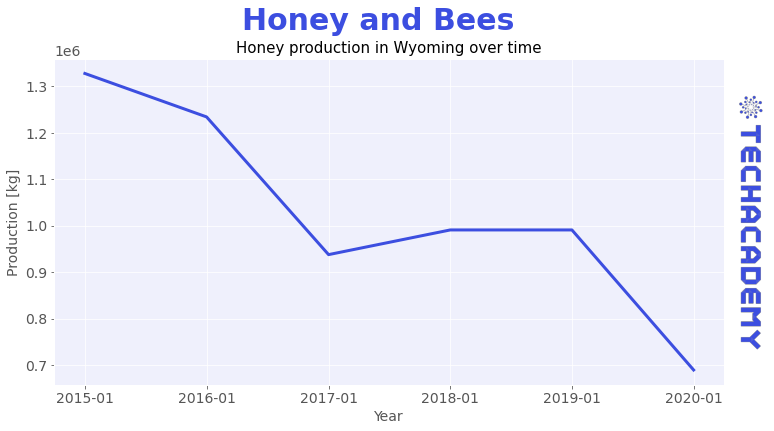

In [29]:
state = "Wyoming"
suptitle = "Honey and Bees"
title = f"Honey production in {state} over time"
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Production [kg]')

# plot data
df = state_year_prod[state:state]
ax.plot(df.index.get_level_values('Year'), df.values)

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
# date formatting
ax.xaxis.set_major_formatter(myFmt)
plt.savefig(f"./figs/{title}.jpg", bbox_inches="tight", dpi=800)